In [125]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math

### The time format is in UTC for GT  
Something to think about as you review the trends, and might want to aggregate the different timezones in the US to a central zone... maybe CT.

The score given by the data is actually a relative score that, in order to be used as a metric of popularity, needs to be scaled.

In [ ]:
# Some scraped tweets
tweets = pd.read_csv('tweets2.csv')
more_tweets = pd.read_csv('old_tweets.csv')

In [ ]:
history = tweets.copy()
history = history[['date', 'tweet']]
more_history = more_tweets.copy()
more_history = more_history[['date','tweet']]

In [ ]:
print(history.shape)
print(more_history.shape)


In [ ]:
type(more_history['date'])

In [ ]:
more_history['date'] = pd.to_datetime(more_history['date'])

In [ ]:
more_history['date'][0]

In [ ]:
history['date'] = pd.to_datetime(history['date'])
more_history['date'] = pd.to_datetime(more_history['date'])

In [ ]:
# history['instances']=history.groupby('date').transform('count')
more_history['instances']=more_history.groupby('date').transform('count')

In [ ]:
# history = history.loc[~history.index.duplicated(keep='first')]
# more_history = more_history.loc[~more_history.index.duplicated(keep='first')]

In [ ]:
type(more_history['date'][0])

In [ ]:
more_history.set_index('date', inplace=True)

In [ ]:
mon_hist = more_history.resample('M').sum()

In [ ]:
mon_hist[:'2019'].plot()

In [ ]:
# When turned into a yearly interval, non-stationarity occurs
# At Q, M, or 
dftest2(mon_hist[:'2019'])

In [ ]:
r_mean = mon_hist[:'2019'].rolling(window=12, center=False).mean()
fig = plt.figure(figsize=(12,7))
plt.plot(mon_hist[:'2019'], color='blue',label='original')
plt.plot(r_mean, color='black', label='rolling mean')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def dftest2(data):
    test = adfuller(data['instances'])
    test_output = pd.Series(test[0:4], index=['Test Stat', 'P-Value', '# Lags', '# Observations'])
    for key, value in test[4].items():
        test_output['Critical Value (%s)' %key]=value
    return(test_output)

The data is stationary, not sure what this means for the future of this dataset.  
Going to look into the Google Trends data again now that I have my VPN set up to prevent Google from blocking me.

In [ ]:
gt_1520 = pytrends.get_historical_interest(['urban farm'], year_start=2015, geo='US',
                                           year_end=2019, month_end=12)

In [ ]:
gt_1520 = pytrends.get_historical_interest(['urban farm'], year_start=2015, geo='US',
                                           year_end=2019, month_end=12)

In [ ]:
# Captured almost all of the data I wanted
gt_1520

In [ ]:
# Saving this data, looks good
gt_1520.to_csv('gt_1520.csv')

In [ ]:
## This failed to run but I can probably change my location on VPN to get it to run
# gt_0914 = pytrends.get_historical_interest(['urban farm'], year_start=2009, geo='US',
#                                            year_end=2014, month_end=12)

In [ ]:
gt_0914 = pytrends.get_historical_interest(['urban farm'], year_start=2009, geo='US',
                                           year_end=2014, month_end=12)

In [ ]:
gt_1520['2015':'2018'].resample('M').sum().plot()

In [43]:
def dftest3(data):
    test = adfuller(data)
    test_output = pd.Series(test[0:4], index=['Test Stat', 'P-Value', '# Lags', '# Observations'])
    for key, value in test[4].items():
        test_output['Critical Value (%s)' %key]=value
    return(test_output)

In [ ]:
dftest3(gt_1520['2015':'2018'].resample('M').sum())

In [ ]:
ind_farm = pd.read_csv('ind_farm.csv')

In [ ]:
ind_farm = ind_farm[['date', 'tweet']]
ind_farm['date'] = pd.to_datetime(ind_farm['date'])
ind_farm.set_index('date', inplace=True)

In [ ]:
ind_farm

In [ ]:
ind_farm['instances']=ind_farm.groupby('date').transform('count')

In [ ]:
ind_farm

In [ ]:
ind_farm.drop(columns=['tweet'], axis=1, inplace=True)

In [ ]:
ind_farm = ind_farm.loc[~ind_farm.index.duplicated(keep='first')]

In [ ]:
ind_farm['2018':'2011'].resample('M').sum().plot()

In [ ]:
ind_farm['2017']

In [ ]:
dftest2(ind_farm.resample('W').sum())

In [ ]:
vert_farms = pd.read_csv('vert_farm.csv')

In [ ]:
urfa = pd.read_csv('urfa.csv')

In [ ]:
urfa = process_tweets(urfa)

In [ ]:
urfa['2015':'2010'].resample('M').sum().plot()

In [ ]:
dftest2(urfa['2015':'2010'].resample('W').sum())

In [ ]:
auto_corrs(urfa.resample('M').sum(), 'Urban Farming')

In [13]:
# Retrying this, just changed IP address
gt_0914 = pytrends.build_payload(['vertical farm'], geo='US', timeframe='2000-01-01 2019-01-01')
v_farm_gt = pytrends.interest_over_time()

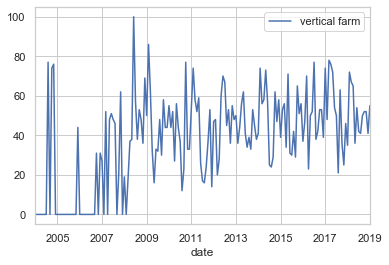

In [16]:
v_farm_gt.drop(columns=['isPartial'], axis=1, inplace=True)
v_farm_gt.plot()

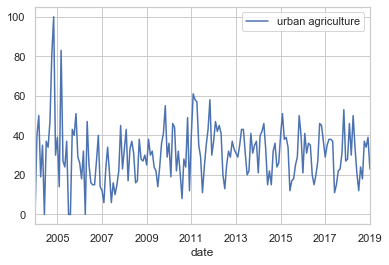

In [17]:
pytrends.build_payload(['urban agriculture'], geo='US', timeframe='2000-01-01 2019-01-01')
urbag_gt = pytrends.interest_over_time()
urbag_gt.drop(columns=['isPartial'], axis=1, inplace=True)
urbag_gt.plot()

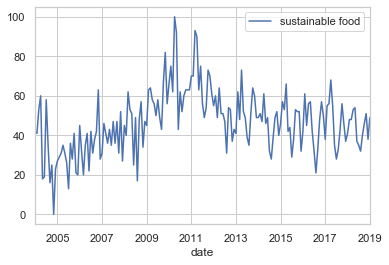

In [18]:
pytrends.build_payload(['sustainable food'], geo='US', timeframe='2000-01-01 2019-01-01')
susfood_gt = pytrends.interest_over_time()
susfood_gt.drop(columns=['isPartial'], axis=1, inplace=True)
susfood_gt.plot()

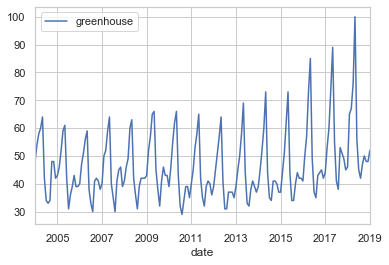

In [22]:
get_int('greenhouse')

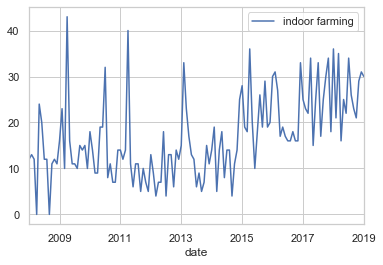

In [40]:
indfa_int = get_int('indoor farming')
indfa_int['2008':].plot()

In [47]:
indfa_int

,indoor farming
date,
2004-01-01,61
2004-02-01,0
2004-03-01,0
2004-04-01,0
2004-05-01,0
...,...
2018-09-01,23
2018-10-01,21
2018-11-01,29


In [44]:
dftest3(indfa_int['2008':])

Test Stat                -0.467187
P-Value                   0.898262
# Lags                   13.000000
# Observations          119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64

In [23]:
indoor = pd.read_csv('ind_farming_gt.csv')

In [35]:
indoor

,Category: All categories
Month,indoor farming: (United States)
2010-01,46
2010-02,49
2010-03,33
2010-04,23
...,...
2020-01,86
2020-02,81
2020-03,58
2020-04,95


In [29]:
indoor.index = pd.to_datetime(indoor.index)

ValueError: ('Unknown string format:', 'Month')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA for indoor farming
                             ARIMA Model Results                              
Dep. Variable:       D.indoor farming   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.295
Method:                       css-mle   S.D. of innovations              0.509
Date:                Thu, 14 May 2020   AIC                            132.589
Time:                        14:09:45   BIC                            142.265
Sample:                    02-01-2009   HQIC                           136.476
                         - 12-01-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0030      0.010      0.310      0.757      -0.016       0.022
ar.L1.D.indoor farming     0.1282      0.139      0.924      0.355    

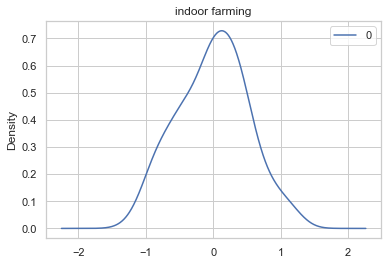

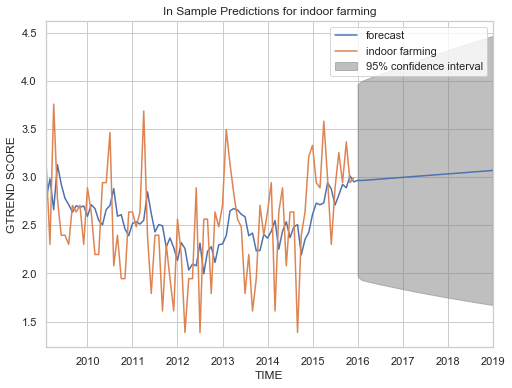

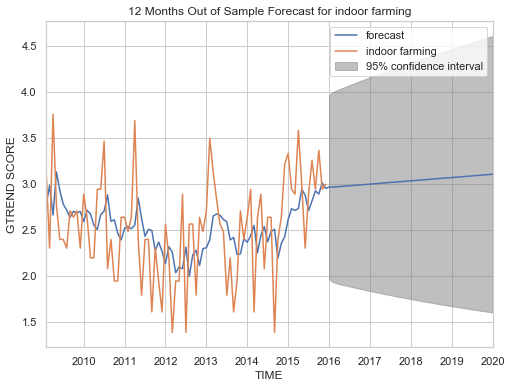

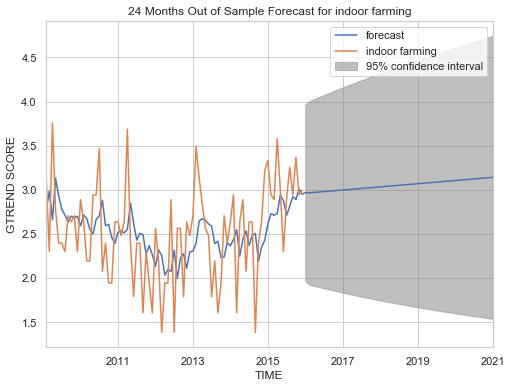

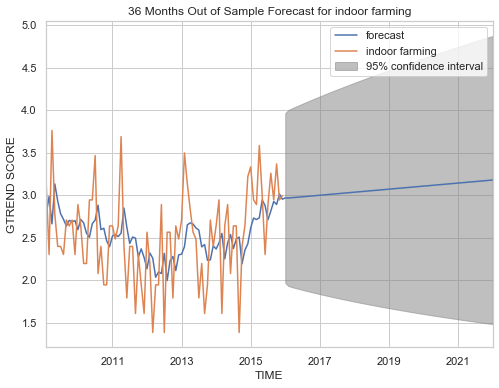

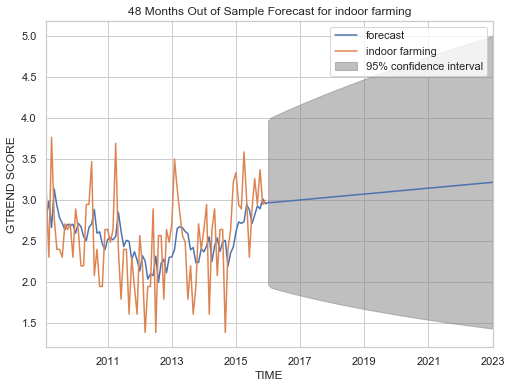

In [121]:
arima_logm(log_indoor['2009':], (1,1,1), 'indoor farming')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA for indoor farming
                             ARIMA Model Results                              
Dep. Variable:       D.indoor farming   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -288.470
Method:                       css-mle   S.D. of innovations              7.756
Date:                Thu, 14 May 2020   AIC                            584.940
Time:                        14:11:23   BIC                            594.615
Sample:                    02-01-2009   HQIC                           588.827
                         - 12-01-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0443      0.117      0.380      0.704      -0.184       0.273
ar.L1.D.indoor farming     0.1443      0.131      1.100      0.271    

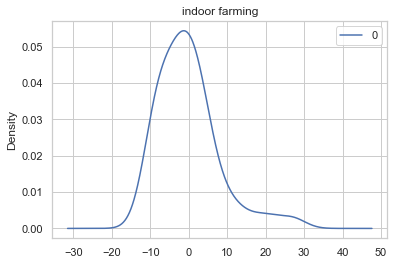

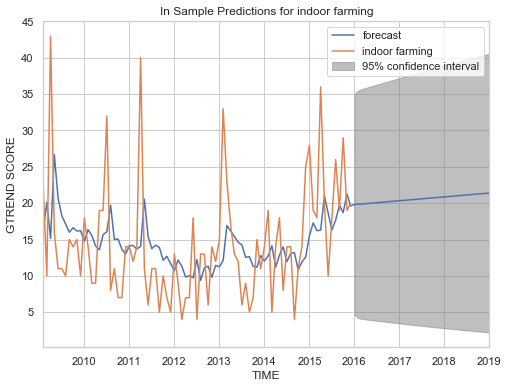

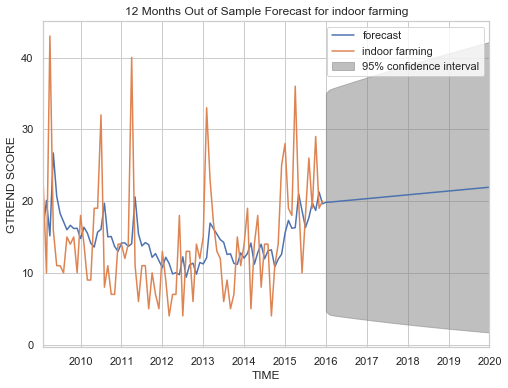

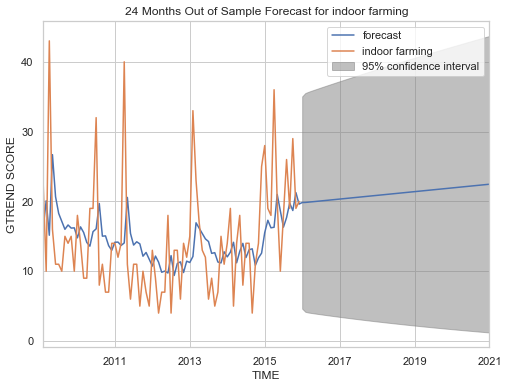

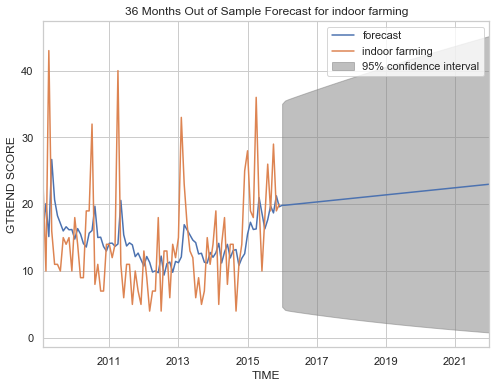

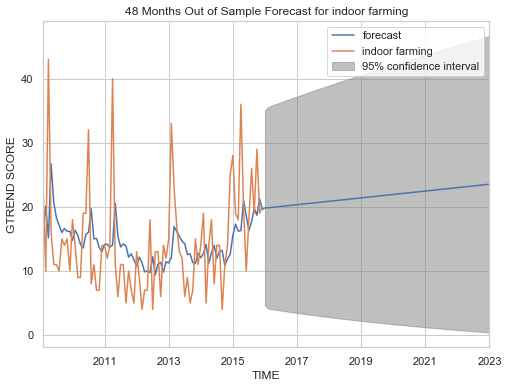

In [123]:
arima_logm(indfa_int['2009':], (1,1,1), 'indoor farming')

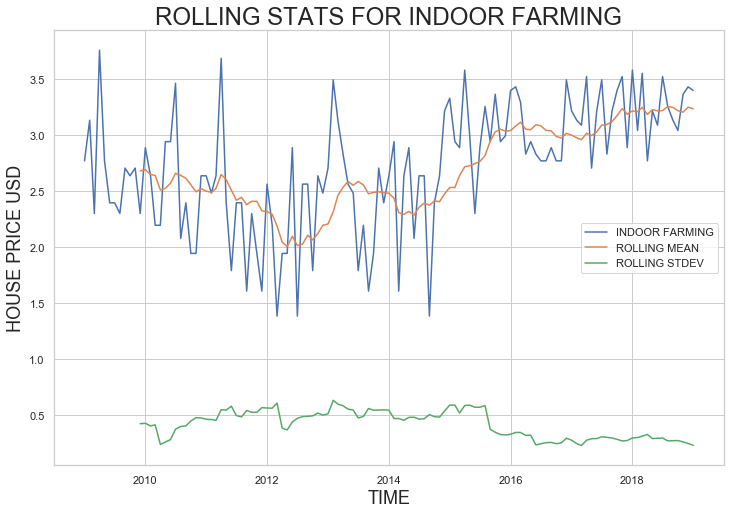

In [130]:
rolling_stats(log_indoor['2009':], 12, 'INDOOR FARMING')

In [65]:
indfa_int['2016':].shape

(37, 1)

In [154]:
arima_search(indfa_int['2008':], [0], [1,2], [1,2])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anacond

(('Best ARIMA Parameters for AIC: ', (0, 1, 1)),
 ('Best ARIMA Parameters for RMSE: ', (0, 2, 1)))

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

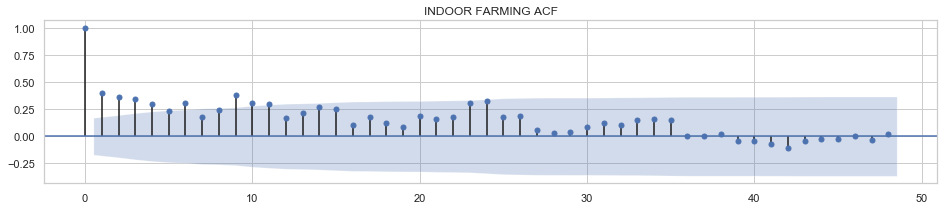

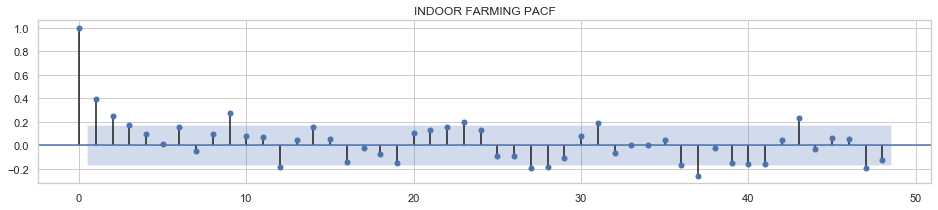

In [67]:
auto_corrs(indfa_int['2008':], 'INDOOR FARMING')

In [88]:
log_indoor = np.log(indfa_int['2009':])

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

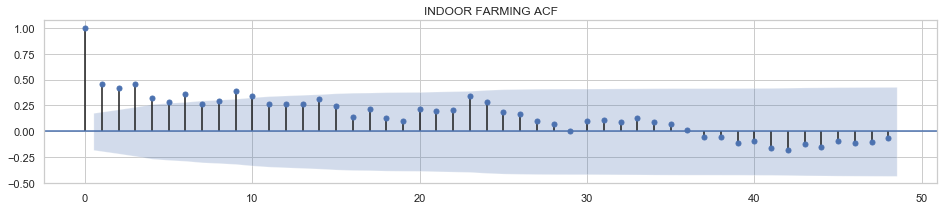

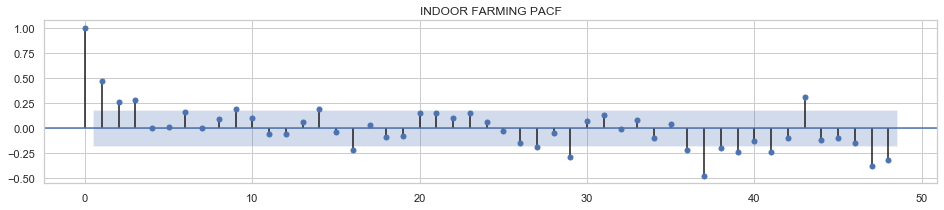

In [89]:
auto_corrs(log_indoor, 'INDOOR FARMING')

In [152]:
arima_search(log_indoor, [0], [1,2], [2,3,4,5])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaco

(('Best ARIMA Parameters for AIC: ', (0, 1, 4)),
 ('Best ARIMA Parameters for RMSE: ', (0, 1, 3)))

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(log_indoor['2009':], model='multiplicative')
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid


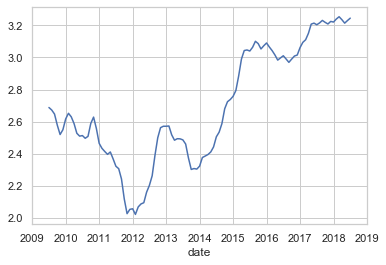

In [149]:
trend.plot()

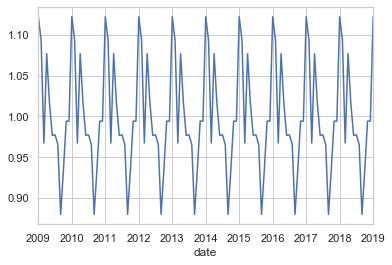

In [150]:
seasonal.plot()

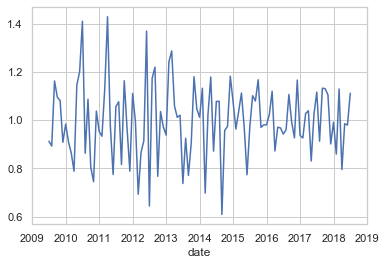

In [151]:
residual.plot()

In [162]:
indfa_int = indfa_int['2009':]

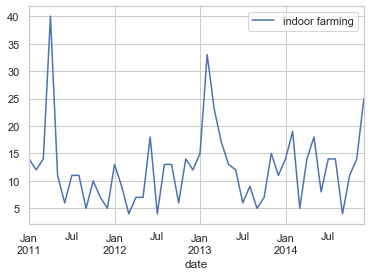

In [165]:
indfa_int['2011':'2014'].plot()